#Download and import Libraries

In [1]:
!pip install requests tqdm

In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
import requests
import json
import csv
import time
import re
from tqdm import tqdm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [6]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.8 MB/s eta 0:00:00


#Load Dataset and Fillter

In [ ]:
# df = pd.read_excel("text_stock.xlsx")
# df.to_csv("text_stock.csv", index=False, encoding="utf-8-sig")

In [10]:
df = pd.read_csv("text_stock.csv")
df.head()

,url,title,time,category,content,tags,content_token_counts
0,https://baodautu.vn/nam-dinh-thanh-lap-cum-con...,Nam Định thành lập Cụm công nghiệp Mỹ Tân vốn ...,2024-12-31,Đầu tư,"Với tổng mứcđầu tưlên tới 266 tỷ đồng, CCN Mỹ ...","CCN Mỹ Tân, thành phố Nam Định, Công ty cổ phầ...",711
1,https://baodautu.vn/nganh-tai-chinh-se-tao-die...,Ngành tài chính sẽ tạo điều kiện huy động mọi ...,2024-12-31,Tài chính - Chứng khoán,"Chiều 31/12, Thủ tướng Chính phủ Phạm Minh Chí...","Hội nghị tổng kết, Bộ Tài chính, thu ngân sách",1910
2,https://baodautu.vn/doanh-nghiep-thanh-pho-tha...,Doanh nghiệp thành phố Thái Bình hướng về ngườ...,2024-12-31,Doanh nghiệp,"Trong những năm qua, cộng đồngdoanh nghiệpvàdo...","doanh nghiệp thành phố Thái Bình, thành phố Th...",677
3,https://baodautu.vn/batdongsan/the-ninety-comp...,The Ninety Complex - “dẫn sóng” đầu tư căn hộ ...,2024-12-31,Dự án - quy hoạch,"Tại các nước phát triển, việc sở hữu căn hộ có...","The Ninety Complex, bất động sản Đống Đa, căn ...",1206
4,https://baodautu.vn/batdongsan/bai-bo-mot-phan...,"Bãi bỏ một phần, toàn bộ một số Quyết định của...",2024-12-31,Chuyển động thị trường,1. Quyết định số 44/2010/QĐ-TTg ngày 10/6/2010...,"Thông tư trong lĩnh vực tài chính đất đai, bãi...",663


In [11]:
df.tail()

,url,title,time,category,content,tags,content_token_counts
107195,https://vneconomy.vn/thi-truong-can-bo-quy-tac...,Thị trường cần bộ quy tắc ứng xử trong thu hồi nợ,2024-04-23,Tài chính,Chia sẻ tại hội thảo “Nâng cao tính lành mạnh ...,"mua bán nợ, ngân hàng, nợ xấu, tài chính, Tạp ...",1349
107196,https://vneconomy.vn/my-va-trung-quoc-tranh-lu...,Mỹ và Trung Quốc tranh luận về dư thừa công suất,2024-04-23,Thế giới,"Trở về từ chuyến công du Trung Quốc mới đây, B...","dư thừa công suất, kinh tế trung quốc, quan hệ...",1472
107197,https://vneconomy.vn/dong-tien-chua-chu-dong-t...,Dòng tiền chưa chủ động tham gia thị trường,2024-04-22,Chứng khoán,VnEconomy giới thiệu nhận định và khuyến nghị ...,"chứng khoán, nhận định thị trường chứng khoán ...",1676
107198,https://vneconomy.vn/thi-truong-hoi-nha-dau-tu...,"Thị trường hồi, nhà đầu tư cá nhân tranh thủ c...",2024-04-22,Chứng khoán,Áp lực về margin được giải tỏa khi con số từ b...,"Cá nhân bán ròng, chứng khoán",1089
107199,https://vneconomy.vn/quy-1-2024-fpt-ghi-nhan-l...,"Quý 1/2024, FPT ghi nhận lợi nhuận tăng hơn 20...",2024-04-22,Chứng khoán,Công ty Cổ phần FPT (mã FPT-HOSE) công bố kết ...,"chứng khoán, ESOP, FPT",720


In [12]:
df.shape

(107200, 7)

In [13]:
df["time"] = pd.to_datetime(df["time"])

# --- TIME FILTER ---
df = df[df["time"] >= "2019-11-30"]

# --- CATEGORY FILTER ---
allowed_cats = ["Chứng khoán", "Tài chính - Chứng khoán"]
df = df[df["category"].isin(allowed_cats)]

# --- TAG KEYWORD FILTER ---
keywords = [
    "ACB", "Á Châu",
    "vàng", "GDP", "Kinh tế",
    "tài chính", "CPI",
    "tỷ giá", "đối hoài",
    "usd", "vnd","thị trường","chứng khoán"
]

df["tags_clean"] = df["tags"].fillna("").str.lower()
keywords_lower = [k.lower() for k in keywords]

mask_tags = df["tags_clean"].apply(lambda x: any(k in x for k in keywords_lower))

filtered_df = df[mask_tags].copy()

In [14]:
filtered_df = filtered_df.sort_values(by="time", ascending=True)
filtered_df.head()

,url,title,time,category,content,tags,content_token_counts,tags_clean
25782,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,2019-12-16,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư",404,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư"
25777,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",2019-12-16,Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Thị trường chứng khoán Việt Nam, Thị trường ch...",932,"thị trường chứng khoán việt nam, thị trường ch..."
25763,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",2019-12-17,Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,"đồng bảng anh, gái vàng, USD",443,"đồng bảng anh, gái vàng, usd"
25687,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,2019-12-20,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,"Thị trường chứng khoán, cổ phiếu penny, cổ phi...",939,"thị trường chứng khoán, cổ phiếu penny, cổ phi..."
25641,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,2019-12-23,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,"chứng khoán Trung Quốc, chứng khoán châu Á, Do...",746,"chứng khoán trung quốc, chứng khoán châu á, do..."


In [15]:
filtered_df.shape

(11507, 8)

In [16]:
# Tạo cột date
filtered_df["date"] = filtered_df["time"].dt.date

In [17]:
filtered_df.head()

,url,title,time,category,content,tags,content_token_counts,tags_clean,date
25782,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,2019-12-16,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư",404,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư",2019-12-16
25777,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",2019-12-16,Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Thị trường chứng khoán Việt Nam, Thị trường ch...",932,"thị trường chứng khoán việt nam, thị trường ch...",2019-12-16
25763,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",2019-12-17,Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,"đồng bảng anh, gái vàng, USD",443,"đồng bảng anh, gái vàng, usd",2019-12-17
25687,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,2019-12-20,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,"Thị trường chứng khoán, cổ phiếu penny, cổ phi...",939,"thị trường chứng khoán, cổ phiếu penny, cổ phi...",2019-12-20
25641,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,2019-12-23,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,"chứng khoán Trung Quốc, chứng khoán châu Á, Do...",746,"chứng khoán trung quốc, chứng khoán châu á, do...",2019-12-23


In [18]:
# 1. Xóa cột time nếu còn
if "time" in filtered_df.columns:
    filtered_df = filtered_df.drop(columns=["time"])

# 2. Đưa cột date lên đầu
cols = ["date"] + [col for col in filtered_df.columns if col != "date"]
filtered_df = filtered_df[cols]

# 3. Set index = date
filtered_df = filtered_df.set_index("date")

# 4. Đảm bảo index dạng datetime (rất quan trọng cho time-series)
filtered_df.index = pd.to_datetime(filtered_df.index)

filtered_df.head()

,url,title,category,content,tags,content_token_counts,tags_clean
date,,,,,,,
2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư",404,"bảo việt, bvsc, chứng khoán, ngân hàng đầu tư"
2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Thị trường chứng khoán Việt Nam, Thị trường ch...",932,"thị trường chứng khoán việt nam, thị trường ch..."
2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,"đồng bảng anh, gái vàng, USD",443,"đồng bảng anh, gái vàng, usd"
2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,"Thị trường chứng khoán, cổ phiếu penny, cổ phi...",939,"thị trường chứng khoán, cổ phiếu penny, cổ phi..."
2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,"chứng khoán Trung Quốc, chứng khoán châu Á, Do...",746,"chứng khoán trung quốc, chứng khoán châu á, do..."


In [19]:
filtered_df = filtered_df.drop(columns=["tags_clean"])
filtered_df = filtered_df.drop(columns=["content_token_counts"])
filtered_df = filtered_df.drop(columns=["tags"])

In [20]:
filtered_df.shape

(11507, 4)

In [21]:
filtered_df.head()

,url,title,category,content
date,,,,
2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...
2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn..."
2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...
2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...
2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...


In [22]:
filtered_df.tail()

,url,title,category,content
date,,,,
2025-06-30,https://vneconomy.vn/gmd-du-chi-hon-840-ty-tra...,GMD dự chi hơn 840 tỷ trả cổ tức 2024 và lên k...,Chứng khoán,Công ty Cổ phần GEMADEPT (mã GMD-HOSE) thông b...
2025-06-30,https://vneconomy.vn/khoi-ngoai-gom-rong-gan-6...,Khối ngoại gom ròng gần 600 tỷ chủ yếu mua cổ ...,Chứng khoán,Thị trường tăng điểm ít nhưng sắc xanh lan tỏa...
2025-06-30,https://vneconomy.vn/gia-cao-su-tiep-tuc-hoi-p...,Giá cao su tiếp tục hồi phục và neo ở mức cao ...,Chứng khoán,Nhìn lại bối cảnh giá cao su quý 1/2025 cho th...
2025-06-30,https://vneconomy.vn/cung-voi-ky-vong-thue-qua...,"Cùng với kỳ vọng thuế quan thấp 10-15%, lịch s...",Chứng khoán,Chứng khoán thế giới đang được hỗ trợ bởi tin ...
2025-06-30,https://vneconomy.vn/mwg-chot-danh-sach-co-don...,MWG chốt danh sách cổ đông chi gần 1.480 tỷ đồ...,Chứng khoán,Công ty Cổ phần Đầu tư Thế Giới Di Động (mã MW...


##Thêm Data cho đến 20/10/2025

In [23]:
# Đọc file CSV mới
df_new = pd.read_csv("vietnam_finance_news_dataset.csv")
df_new.head()

,date,url,title,category,content
0,2025-07-01,https://vneconomy.vn/vndirect-7-chu-de-dau-tu-...,"VnDirect: 7 chủ đề đầu tư cuối năm 2025, nâng ...",Chứng khoán,"VN-Index ghi nhận mức tăng ấn tượng 6,7% từ đầ..."
1,2025-07-02,https://vneconomy.vn/gia-vang-mieng-sjc-tang-m...,Giá vàng miếng SJC tăng mạnh nhất kể từ giữa t...,Giá vàng,Giá giao dịch vàng miếng SJC bật tăng 800 nghì...
2,2025-07-03,https://vneconomy.vn/ngan-hang-nha-nuoc-neu-nh...,Ngân hàng Nhà nước nêu yếu tố chi phối tỷ giá ...,Tỷ giá,"Đến hết tháng 6, VND đã mất giá khoảng 2,8% so..."
3,2025-07-04,https://vneconomy.vn/phat-hanh-trai-phieu-doan...,Phát hành trái phiếu doanh nghiệp tháng 6/2025...,Trái phiếu,Động lực chính từ nhóm ngân hàng với hơn 80% t...
4,2025-07-05,https://vneconomy.vn/thi-truong-tiep-tuc-thuan...,"Thị trường tiếp tục thuận lợi, VN-Index tiến v...",Chứng khoán,"P/E của VN-Index tăng từ 12,91x lên 14,1x gần ..."


In [24]:
# Chuẩn hóa cột ngày
df_new["date"] = pd.to_datetime(df_new["date"])

# Reset index của filtered_df nếu đang dùng date làm index
filtered_df_reset = filtered_df.reset_index()

# Đồng bộ các cột giữa 2 dataframe
for col in filtered_df_reset.columns:
    if col not in df_new.columns:
        df_new[col] = None

# Ghép 2 dataframe
combined_df = pd.concat([filtered_df_reset, df_new], ignore_index=True)

# Sort theo ngày
combined_df = combined_df.sort_values("date")

# Đặt lại index
combined_df = combined_df.set_index("date")
combined_df.index = pd.to_datetime(combined_df.index)

combined_df.tail()

,url,title,category,content
date,,,,
2025-10-16,https://vneconomy.vn/acb-ty-le-no-xau-giam-con...,"ACB tỷ lệ nợ xấu giảm còn 1,09%",Ngân hàng ACB,"Tỷ lệ nợ xấu ACB giảm còn 1,09% thuộc nhóm thấ..."
2025-10-17,https://vneconomy.vn/vn-index-tang-manh-trong-...,VN-Index tăng mạnh trong phiên cuối tuần,Chứng khoán,VN-Index tăng 20 điểm vượt mốc 1.690 điểm. Nhó...
2025-10-18,https://vneconomy.vn/ty-gia-giam-ve-muc-thap-2...,Tỷ giá giảm về mức thấp 2 tháng,Tỷ giá,Tỷ giá USD/VND giảm về gần mốc 26.300 - mức th...
2025-10-19,https://vneconomy.vn/gia-vang-sjc-giam-theo-th...,Giá vàng SJC giảm theo thế giới,Giá vàng,"Giá vàng SJC giảm 0,47%. Giá vàng thế giới giả..."
2025-10-20,https://vneconomy.vn/quy-32025-acb-duy-tri-tan...,Quý 3/2025: ACB duy trì tăng trưởng ổn định nă...,Ngân hàng ACB,ACB công bố kết quả kinh doanh quý 3 với lợi n...


In [25]:
combined_df.head()

,url,title,category,content
date,,,,
2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...
2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn..."
2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...
2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...
2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...


In [26]:
combined_df.shape

(11619, 4)

In [27]:
combined_df.to_csv('kaggle_news.csv', index=True, encoding='utf-8-sig')

#Preprocessing

- Loại bỏ ký tự lỗi: \n, \t
- Loại bỏ emoji (nếu có)
- Chuẩn hóa khoảng trắng
- Thay kí tự HTML (&#39;, &quot;, &amp;, …)
- Giữ nguyên ký tự quan trọng của kinh tế: % . , / -
- Không xóa dấu tiếng Việt
- Không xóa số

In [28]:
combined_df = pd.read_csv("kaggle_news.csv")
combined_df.head()

,date,url,title,category,content
0,2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...
1,2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn..."
2,2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...
3,2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...
4,2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...


In [29]:
combined_df.tail()

,date,url,title,category,content
11614,2025-10-16,https://vneconomy.vn/acb-ty-le-no-xau-giam-con...,"ACB tỷ lệ nợ xấu giảm còn 1,09%",Ngân hàng ACB,"Tỷ lệ nợ xấu ACB giảm còn 1,09% thuộc nhóm thấ..."
11615,2025-10-17,https://vneconomy.vn/vn-index-tang-manh-trong-...,VN-Index tăng mạnh trong phiên cuối tuần,Chứng khoán,VN-Index tăng 20 điểm vượt mốc 1.690 điểm. Nhó...
11616,2025-10-18,https://vneconomy.vn/ty-gia-giam-ve-muc-thap-2...,Tỷ giá giảm về mức thấp 2 tháng,Tỷ giá,Tỷ giá USD/VND giảm về gần mốc 26.300 - mức th...
11617,2025-10-19,https://vneconomy.vn/gia-vang-sjc-giam-theo-th...,Giá vàng SJC giảm theo thế giới,Giá vàng,"Giá vàng SJC giảm 0,47%. Giá vàng thế giới giả..."
11618,2025-10-20,https://vneconomy.vn/quy-32025-acb-duy-tri-tan...,Quý 3/2025: ACB duy trì tăng trưởng ổn định nă...,Ngân hàng ACB,ACB công bố kết quả kinh doanh quý 3 với lợi n...


In [30]:
import re
import html
import pandas as pd

def minimal_clean(text):
    """Preprocessing tối thiểu cho model embedding hiện đại"""
    if pd.isna(text):
        return ""

    text = str(text)

    # 1. Giải mã HTML entities
    text = html.unescape(text)

    # 2. Bỏ HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # 3. Bỏ URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # 4. Bỏ emoji và ký tự lạ (giữ lại chữ, số, dấu câu cơ bản, tiếng Việt)
    text = re.sub(
        r"[^0-9a-zA-ZÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬÉÈẺẼẸÊẾỀỂỄỆ"
        r"ÍÌỈĨỊÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴĐ"
        r"áàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệ"
        r"íìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữựýỳỷỹỵđ"
        r"%\.\,\/\-\+\$₫\(\)\:\!\?\s]",
        " ",
        text
    )

    # 5. Chuẩn hóa khoảng trắng
    text = ' '.join(text.split())

    return text

In [31]:
#chỉ cho content
combined_df["content_clean"] = combined_df["content"].astype(str).apply(minimal_clean)

In [32]:
combined_df[["content", "content_clean"]].head(20)

,content,content_clean
0,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,Thương hiệu dẫn đầu Việt Nam Vietnam Leading B...
1,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Tính đến hết tháng 11/2019, vốn hóa thị trường..."
2,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...
3,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,Lệnh vào nhấp nháy liên tục trên bảng điện tại...
4,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...
5,Tại cuộc họp của Hiệp hội Kinh doanh chứng kh...,Tại cuộc họp của Hiệp hội Kinh doanh chứng kho...
6,Sau khi được Ủy banChứng khoánNhà nước (UBCK)...,Sau khi được Ủy banChứng khoánNhà nước (UBCK) ...
7,CTCPChứng khoánSSI và CTCP Đầu tư Thế giới Di ...,CTCPChứng khoánSSI và CTCP Đầu tư Thế giới Di ...
8,"Hiện tại, trên thị trường có 38 mã chứng quyề...","Hiện tại, trên thị trường có 38 mã chứng quyền..."
9,"Vài phiên gần đây, thị trường chứng khoán có d...","Vài phiên gần đây, thị trường chứng khoán có d..."


In [33]:
combined_df[["content", "content_clean"]].tail(20)

,content,content_clean
11599,"GDP 9 tháng đạt 7,84% so với cùng kỳ 2024. Kin...","GDP 9 tháng đạt 7,84% so với cùng kỳ 2024. Kin..."
11600,VN-Index tăng 15 điểm trong phiên đầu tháng 10...,VN-Index tăng 15 điểm trong phiên đầu tháng 10...
11601,Tỷ giá USD/VND ổn định quanh 26.500. NHNN tiếp...,Tỷ giá USD/VND ổn định quanh 26.500. NHNN tiếp...
11602,"Giá vàng SJC tăng 800 nghìn đồng lên mức 135,3...","Giá vàng SJC tăng 800 nghìn đồng lên mức 135,3..."
11603,VN-Index vượt mốc 1.670 điểm lập đỉnh mới. Tha...,VN-Index vượt mốc 1.670 điểm lập đỉnh mới. Tha...
11604,"CPI tháng 9 tăng 0,42% do giáo dục và thực phẩ...","CPI tháng 9 tăng 0,42% do giáo dục và thực phẩ..."
11605,ACB ghi nhận lợi nhuận trước thuế 5.400 tỷ đồn...,ACB ghi nhận lợi nhuận trước thuế 5.400 tỷ đồn...
11606,VN-Index giảm 10 điểm trong phiên giao dịch. T...,VN-Index giảm 10 điểm trong phiên giao dịch. T...
11607,Tỷ giá USD/VND giảm nhẹ về mức 26.400. Đồng US...,Tỷ giá USD/VND giảm nhẹ về mức 26.400. Đồng US...
11608,Giá vàng SJC giảm 500 nghìn đồng/lượng theo đà...,Giá vàng SJC giảm 500 nghìn đồng/lượng theo đà...


In [34]:
combined_df.to_csv('kaggle_news_preprocess.csv', index=True, encoding='utf-8-sig')

In [35]:
combined_df.head()

,date,url,title,category,content,content_clean
0,2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,Thương hiệu dẫn đầu Việt Nam Vietnam Leading B...
1,2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Tính đến hết tháng 11/2019, vốn hóa thị trường..."
2,2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...
3,2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,Lệnh vào nhấp nháy liên tục trên bảng điện tại...
4,2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...


In [36]:
!pip install wordcloud

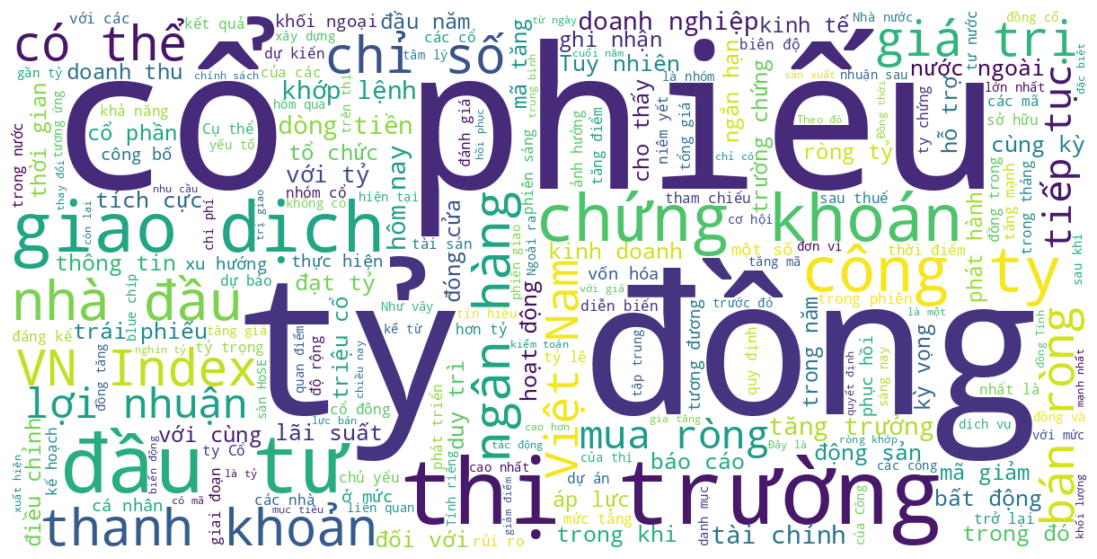

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Giả sử cột đã là content_clean
text = " ".join(combined_df["content_clean"].astype(str).tolist())
len(text)

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white"   # màu nền, còn màu chữ để mặc định
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

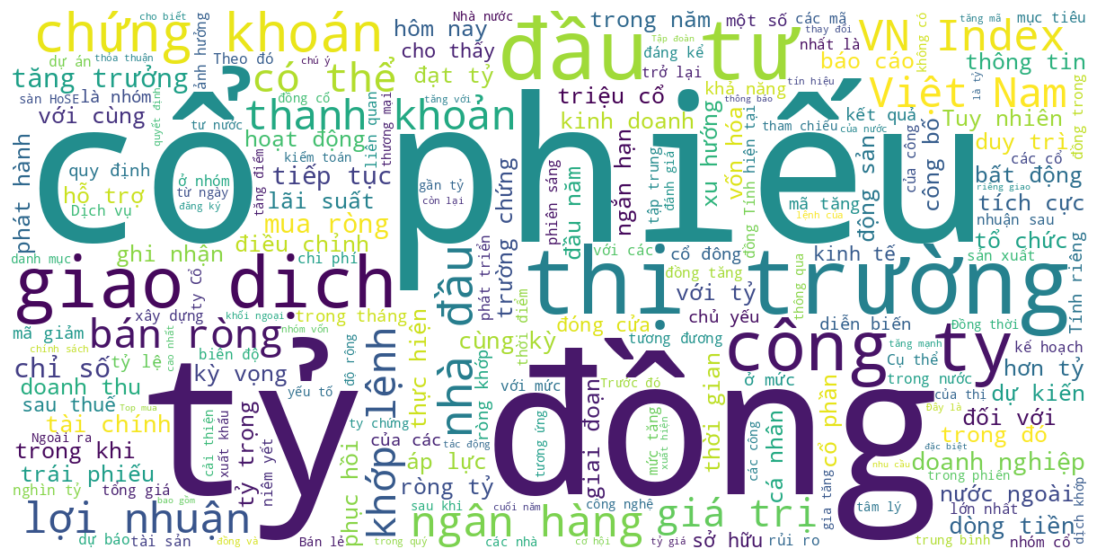

In [38]:
combined_df["date"] = pd.to_datetime(combined_df["date"])
combined_df = combined_df.set_index("date")

mask_2024 = combined_df.index >= "2024-01-01"
text_2024 = " ".join(combined_df.loc[mask_2024, "content_clean"].astype(str))

wc_2024 = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text_2024)

plt.figure(figsize=(14, 7))
plt.imshow(wc_2024, interpolation="bilinear")
plt.axis("off")
plt.show()

#ĐẾM TOKENS CỦA CỘT CONTENT

In [39]:
from transformers import AutoTokenizer
import pandas as pd

# Load tokenizers
print("Loading tokenizers...")
tok_phobert = AutoTokenizer.from_pretrained("vinai/phobert-base")
tok_vn_embed = AutoTokenizer.from_pretrained("AITeamVN/Vietnamese_Embedding")
tok_vn_doc = AutoTokenizer.from_pretrained("dangvantuan/vietnamese-document-embedding", trust_remote_code=True)

# Đếm tokens
combined_df['tok_phobert'] = combined_df['content'].apply(lambda x: len(tok_phobert.encode(str(x))) if pd.notna(x) else 0)
combined_df['tok_vn_embed'] = combined_df['content'].apply(lambda x: len(tok_vn_embed.encode(str(x))) if pd.notna(x) else 0)
combined_df['tok_vn_doc'] = combined_df['content'].apply(lambda x: len(tok_vn_doc.encode(str(x))) if pd.notna(x) else 0)

# Thống kê
print("\n" + "="*60)
print("MODEL                          | MAX  | % FIT  | MAX IN DATA")
print("="*60)
print(f"PhoBERT-base/large             | 256  | {(combined_df['tok_phobert']<=256).mean()*100:5.1f}% | {combined_df['tok_phobert'].max():,}")
print(f"Vietnamese_Embedding (AITeamVN)| 2048 | {(combined_df['tok_vn_embed']<=2048).mean()*100:5.1f}% | {combined_df['tok_vn_embed'].max():,}")
print(f"vietnamese-document-embedding  | 8192 | {(combined_df['tok_vn_doc']<=8192).mean()*100:5.1f}% | {combined_df['tok_vn_doc'].max():,}")
print("="*60)

Loading tokenizers...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]


MODEL                          | MAX  | % FIT  | MAX IN DATA
PhoBERT-base/large             | 256  |   1.2% | 2,713
Vietnamese_Embedding (AITeamVN)| 2048 | 100.0% | 1,999
vietnamese-document-embedding  | 8192 | 100.0% | 1,999


# 📊 Báo Cáo Phân Tích Token Count

## Kết Quả Thống Kê
```
============================================================
MODEL                          | MAX  | % FIT  | MAX IN DATA
============================================================
PhoBERT-base/large             | 256  |   1.2% | 2,713
Vietnamese_Embedding (AITeamVN)| 2048 | 100.0% | 1,999
vietnamese-document-embedding  | 8192 | 100.0% | 1,999
============================================================
```

---

## 1. Giải Thích Các Cột

| Cột | Ý nghĩa |
|-----|---------|
| **MODEL** | Tên model embedding được đánh giá |
| **MAX** | Số tokens tối đa mà model có thể xử lý trong 1 lần |
| **% FIT** | Phần trăm văn bản trong dataset nằm trong giới hạn MAX |
| **MAX IN DATA** | Số tokens của văn bản dài nhất trong dataset |

---

## 2. Phân Tích Từng Model

### 2.1. PhoBERT-base/large

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 256 tokens |
| % FIT | 1.2% |
| MAX IN DATA | 2,713 tokens |

**Giải thích:**
- ✅ **1.2%** văn bản có độ dài ≤ 256 tokens → Giữ nguyên, không mất thông tin
- ❌ **98.8%** văn bản có độ dài > 256 tokens → Bị **truncate (cắt bỏ)** phần vượt quá

**Hậu quả với 98.8% văn bản bị cắt:**
```
Văn bản 2,713 tokens:  [1] [2] [3] ... [256] | [257] [258] ... [2,713]
                                        ↑
                                   Cắt tại đây
                         
Giữ lại: [1]...[256]     → 9% nội dung
Mất đi:  [257]...[2,713] → 91% nội dung ❌
```

**⚠️ Kết luận: KHÔNG NÊN DÙNG PhoBERT cho dataset này**

---

### 2.2. Vietnamese_Embedding (AITeamVN)

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 2048 tokens |
| % FIT | 100% |
| MAX IN DATA | 1,999 tokens |

**Giải thích:**
- ✅ **100%** văn bản nằm trong giới hạn
- ✅ Văn bản dài nhất (1,999) < Giới hạn (2,048)
- ✅ **Không mất thông tin**
```
MAX IN DATA (1,999) ████████████████████████████████████████████████░░ MAX LIMIT (2,048)
                    ←──────────── 97.6% ────────────→                   ←2.4%→
```

**✅ Kết luận: KHUYẾN NGHỊ SỬ DỤNG**

---

### 2.3. vietnamese-document-embedding

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 8192 tokens |
| % FIT | 100% |
| MAX IN DATA | 1,999 tokens |

**Giải thích:**
- ✅ **100%** văn bản nằm trong giới hạn
- ✅ **Không mất thông tin**
- ⚠️ Dư thừa capacity (chỉ sử dụng 24% giới hạn)
```
MAX IN DATA (1,999) ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ MAX LIMIT (8,192)
                    ←── 24.4% ──→                                       ←── 75.6% dư ──→
```

**✅ Kết luận: Dùng được, nhưng output dimension thấp hơn (768 vs 1024)**

---

## 3. Tại Sao MAX IN DATA Khác Nhau (2,713 vs 1,999)?

Mỗi tokenizer tách từ khác nhau:

| Câu ví dụ | PhoBERT | Vietnamese_Embedding |
|-----------|---------|---------------------|
| "Tăng 2.5%" | ["Tăng", "2", ".", "5", "%"] = 5 tokens | ["Tăng", "2.5%"] = 2 tokens |
| "VNM" | ["V", "N", "M"] = 3 tokens | ["VNM"] = 1 token |

→ PhoBERT dùng BPE, tách nhỏ hơn → cùng văn bản nhưng **nhiều tokens hơn ~35%**

---

## 4. So Sánh Tổng Quan

| Tiêu chí | PhoBERT | Vietnamese_Embedding | vn-document-embedding |
|----------|:-------:|:--------------------:|:---------------------:|
| Max tokens | 256 | 2048 | 8192 |
| Output dim | 768/1024 | **1024** | 768 |
| % Data fit | 1.2% ❌ | **100%** ✅ | **100%** ✅ |
| Mất thông tin? | **98.8%** ❌ | **Không** ✅ | **Không** ✅ |
| Phù hợp? | ❌ Không | ✅ **Tốt nhất** | ✅ Tốt |

---

## 5. Minh Họa Mất Thông Tin
```
Văn bản gốc: "Thị trường chứng khoán Việt Nam hôm nay... [nội dung dài] ...Kết luận: KHUYẾN NGHỊ MUA"
                            ↓
              PhoBERT Tokenizer (tách từ)
                            ↓
             Tổng: 964 tokens (ví dụ)
                            ↓
        PhoBERT chỉ nhận MAX 256 tokens
                            ↓
Giữ lại: "Thị trường chứng khoán..."     ← 27% đầu
Mất đi:  "...Kết luận: KHUYẾN NGHỊ MUA"  ← 73% cuối ❌

→ MẤT phần kết luận quan trọng nhất!
```

---

## 6. Kết Luận & Khuyến Nghị

### ❌ KHÔNG dùng PhoBERT
- 98.8% văn bản bị cắt
- Mất tới 91% nội dung ở văn bản dài nhất
- Không phù hợp với dataset này

### ✅ KHUYẾN NGHỊ: Vietnamese_Embedding (AITeamVN)

| Lý do |
|-------|
| 100% văn bản fit (không mất thông tin) |
| Output 1024 dimensions (chất lượng cao) |
| Fine-tuned cho tiếng Việt |
| Văn bản dài nhất (1,999) vừa đủ giới hạn (2,048) |

---

## 7. Lưu Ý Về Dataset

- **Cấu trúc data:** 1 tin tức = 1 row (đúng cách)
- **1 ngày có nhiều tin:** Lưu thành nhiều rows riêng biệt
- **Không gộp tin tức:** Giữ nguyên từng bài để embedding chính xác
```
Ngày 2019-12-16:
├── Row 1: "BVSC nhận Top 10 thương hiệu..."  (400 tokens)
├── Row 2: "Thị trường chứng khoán..."        (964 tokens)
└── Mỗi row được embedding riêng biệt
```

---

*Báo cáo được tạo từ phân tích token count trên dataset tin tức tài chính*

#EDA dataset

In [40]:
print("Kiểm tra thông tin DataFrame sau khi lọc:")
display(combined_df.info())

Kiểm tra thông tin DataFrame sau khi lọc:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11619 entries, 2019-12-16 to 2025-10-20
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            11619 non-null  object
 1   title          11619 non-null  object
 2   category       11619 non-null  object
 3   content        11619 non-null  object
 4   content_clean  11619 non-null  object
 5   tok_phobert    11619 non-null  int64 
 6   tok_vn_embed   11619 non-null  int64 
 7   tok_vn_doc     11619 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 817.0+ KB


None

In [41]:
# Rows thiếu title
print("Rows thiếu title:")
display(combined_df[combined_df['title'].isna()])

# Rows thiếu content
print("\nRows thiếu content:")
display(combined_df[combined_df['content'].isna()])

Rows thiếu title:


,url,title,category,content,content_clean,tok_phobert,tok_vn_embed,tok_vn_doc
date,,,,,,,,



Rows thiếu content:


,url,title,category,content,content_clean,tok_phobert,tok_vn_embed,tok_vn_doc
date,,,,,,,,


THỐNG KÊ SỐ TIN TỨC MỖI NGÀY:
count    1748.000000
mean        6.647025
std         4.711433
min         1.000000
25%         2.000000
50%         6.000000
75%        10.000000
max        23.000000
dtype: float64

Min: 1 tin/ngày
Max: 23 tin/ngày
Mean: 6.6 tin/ngày

Ngày có nhiều tin nhất:
2024-10-21    23
2023-09-06    21
2024-08-27    21
2023-08-28    20
2023-09-27    20
2024-03-25    20
2024-10-22    20
2025-04-03    20
2024-02-28    19
2024-12-04    19
dtype: int64

Ngày chỉ có 1 tin:
324 ngày


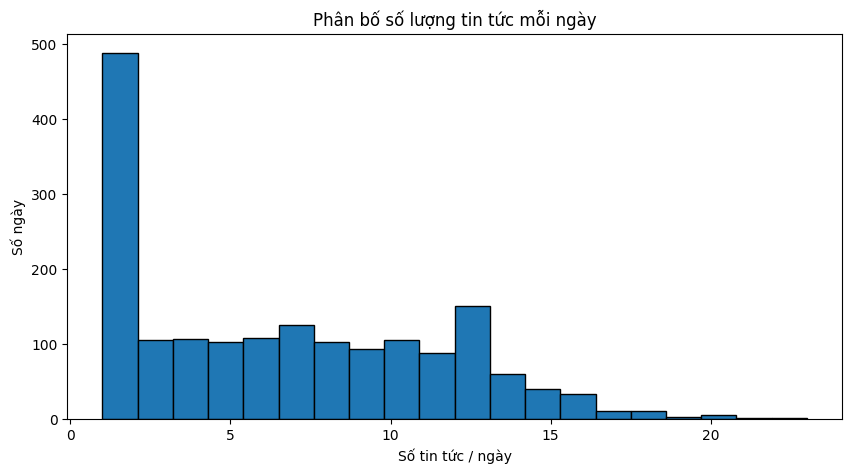

In [42]:
# Đếm số tin tức mỗi ngày
news_per_day = combined_df.groupby(combined_df.index.date).size()

print("THỐNG KÊ SỐ TIN TỨC MỖI NGÀY:")
print(news_per_day.describe())

print(f"\nMin: {news_per_day.min()} tin/ngày")
print(f"Max: {news_per_day.max()} tin/ngày")
print(f"Mean: {news_per_day.mean():.1f} tin/ngày")

# Ngày có nhiều tin nhất
print(f"\nNgày có nhiều tin nhất:")
print(news_per_day.nlargest(10))

# Ngày có ít tin nhất
print(f"\nNgày chỉ có 1 tin:")
print(f"{(news_per_day == 1).sum()} ngày")

# Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(news_per_day, bins=20, edgecolor='black')
plt.xlabel('Số tin tức / ngày')
plt.ylabel('Số ngày')
plt.title('Phân bố số lượng tin tức mỗi ngày')
plt.show()

In [43]:
# Tạo DataFrame thống kê
summary = pd.DataFrame({
    'news_count': news_per_day
})

print(f"Tổng số ngày có tin: {len(news_per_day)}")
print(f"Tổng số tin tức: {news_per_day.sum()}")
print(f"\nPhân bố:")
print(f"  - Ngày có 1 tin:   {(news_per_day == 1).sum()}")
print(f"  - Ngày có 2-5 tin: {((news_per_day >= 2) & (news_per_day <= 5)).sum()}")
print(f"  - Ngày có >5 tin:  {(news_per_day > 5).sum()}")

Tổng số ngày có tin: 1748
Tổng số tin tức: 11619

Phân bố:
  - Ngày có 1 tin:   324
  - Ngày có 2-5 tin: 481
  - Ngày có >5 tin:  943


In [46]:
num_dup_dates = combined_df.index[combined_df.index.duplicated()].nunique()
print("Số date bị trùng:", num_dup_dates)

Số date bị trùng: 1424


In [47]:
dup_detail = (
    combined_df
    .index
    .value_counts()
    .loc[lambda x: x > 1]
)

display(dup_detail)


,count
date,
2024-10-21,23
2024-08-27,21
2023-09-06,21
2025-04-03,20
2024-03-25,20
...,...
2020-02-14,2
2020-02-20,2
2020-01-07,2


In [48]:
combined_df.head()

,url,title,category,content,content_clean,tok_phobert,tok_vn_embed,tok_vn_doc
date,,,,,,,,
2019-12-16,https://baodautu.vn/bvsc-nhan-top-10-thuong-hi...,BVSC nhận “Top 10 thương hiệu dẫn đầu Việt Nam...,Tài chính - Chứng khoán,“Thương hiệu dẫn đầu Việt Nam – Vietnam Leadin...,Thương hiệu dẫn đầu Việt Nam Vietnam Leading B...,400,406,406
2019-12-16,https://baodautu.vn/thi-truong-chung-khoan-tha...,"Thị trường chứng khoán: Thanh khoản muốn tăng,...",Tài chính - Chứng khoán,"Tính đến hết tháng 11/2019, vốn hóa thị trườn...","Tính đến hết tháng 11/2019, vốn hóa thị trường...",964,934,934
2019-12-17,https://baodautu.vn/gia-vang-1412-tiep-tuc-tan...,"Giá vàng 14/12 tiếp tục tăng, đồng bảng Anh lậ...",Tài chính - Chứng khoán,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,Vàng miếng SJC tại Vàng bạc Đá quý Sài Gòn tiế...,443,445,445
2019-12-20,https://baodautu.vn/thi-truong-chung-khoan-tra...,Thị trường chứng khoán: Trăn trở khi penny dậy...,Tài chính - Chứng khoán,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,Lệnh vào nhấp nháy liên tục trên bảng điện tại...,974,941,941
2019-12-23,https://baodautu.vn/chung-khoan-trung-quoc-van...,Chứng khoán Trung Quốc vẫn yên ắng sau tin cắt...,Tài chính - Chứng khoán,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,Chứng khoán Trung Quốc đại lục mở phiên khá ảm...,734,748,748
